#Index Laptop Pricing:
*   Load data
*   Data wrangling
  *   Identify, count and deal with missing values
  *   Data standardization and normalization
  *   Binning
  *   Indicator variable
*   Exploratory data analysis
  *   Continuous numerical variables and categorical variables
  *   Descriptive statistical analysis
  *   Groupby and pivot table
  *   Conclusion - important variables
*   Model Development
  *   Linear Regression: model evaluation with visualization and measures
  *   Multiple Linear Regression: model evaluation with visualization and measures
  *   Polynomial Regression: model evaluation with visualization and measures
  *   Pipeline
  *   Prediction and Decision Making
*   Model Evaluation and refinement
  *   Cross Validation
  *   Ridge Regression
  *   Grid Search

The dataset used is related to laptop. It may include various attributes of laptop, such as price, manufacturer, screen, GPU, CPU Core, and other relevant features.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [2]:
file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"
df=pd.read_csv(file_path,header=0)

In [3]:
#round the values to the second decimal
df[['Screen_Size_cm']] = np.round(df[['Screen_Size_cm']],2)
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


#Evaluate the dataset for missing data

Missing data was last converted from '?' to numpy.NaN. Pandas uses NaN and Null values interchangeably.

This means, I can just identify the entries having Null values.

In [ ]:
missing_data = df.isnull()
print(missing_data.head(5))
#count the missing data
for column in missing_data.columns.values.tolist():
    print (missing_data[column].value_counts())
    print("")

#Deal with missing data
###Replace with mean

Missing values in attributes that have continuous data are best replaced using Mean value. We note that values in "Weight_kg" attribute are continuous in nature, and some values are missing. Replace it with mean value.

In [5]:
avg_weigth=df['Weight_kg'].astype(float).mean(axis=0)
df['Weight_kg']=df['Weight_kg'].replace(np.nan,avg_weigth)

###Replace with the most frequent value
Missing values in attributes that have categorical data are best replaced using the most frequent value. We note that values in "Screen_Size_cm" attribute are categorical in nature, and some values are missing.

In [ ]:
df['Screen_Size_cm'].value_counts()

In [7]:
df['Screen_Size_cm']=df['Screen_Size_cm'].replace(np.nan,39.62)

#Fixing the data types

Both "Weight_kg" and "Screen_Size_cm" are seen to have the data type "Object", while both of them should be having a data type of "float". Write a code to fix the data type of these two columns.

In [8]:
df.dtypes
df[['Screen_Size_cm','Weight_kg']]=df[['Screen_Size_cm','Weight_kg']].astype(float)

#Data Standardization
The value of Screen_size usually has a standard unit of inches. Similarly, weight of the laptop is needed to be in pounds. Use the below mentioned units of conversion and write a code to modify the columns of the dataframe accordingly. Update their names as well.

1 inch = 2.54 cm

1 kg   = 2.205 pounds

In [ ]:
df['Weight_kg']=df['Weight_kg']*2.205
df['Screen_Size_cm']=df['Screen_Size_cm']/2.54
df.rename(columns={'Weight_kg':'Weight_pounds','Screen_Size_cm':'Screen_Size_inch'})

#Data Normalization
Often it is required to normalize a continuous data attribute. Write a code to normalize the "CPU_frequency" attribute with respect to the maximum value available in the dataset

In [10]:
df['CPU_frequency']=df['CPU_frequency']/df['CPU_frequency'].max()

#Binning
Binning is a process of creating a categorical attribute which splits the values of a continuous data into a specified number of groups. In this case, write a code to create 3 bins for the attribute "Price". These bins would be named "Low", "Medium" and "High". The new attribute will be named "Price-binned".

In [ ]:
group_name=['Low','Medium','High']
bins = np.linspace(min(df["Price"]), max(df["Price"]), 4)
df['Price-binned'] = pd.cut(df['Price'], bins, labels=group_name, include_lowest=True )
df[['Price','Price-binned']].head(20)

Text(0.5, 1.0, 'Price bins')

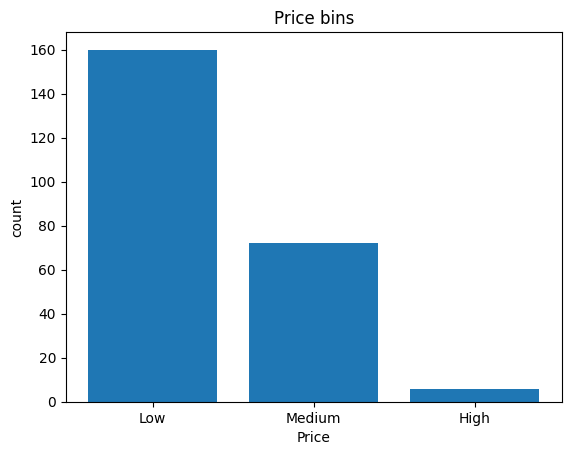

In [12]:
plt.bar(group_name, df["Price-binned"].value_counts())
plt.xlabel("Price")
plt.ylabel("count")
plt.title("Price bins")

#Indicator variables
Convert the "Screen" attribute of the dataset into 2 indicator variables, "Screen-IPS_panel" and "Screen-Full_HD". Then drop the "Screen" attribute from the dataset.

In [13]:
dummy_variable=pd.get_dummies(df['Screen'])
dummy_variable.rename(columns={'Full HD':'Screen-Full_HD','IPS Panel':'Screen-IPS_panel'},inplace=True)
df=pd.concat([df,dummy_variable],axis=1)

In [14]:
df.drop('Screen',axis=1,inplace=True)

In [15]:
df.head()

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,Acer,4,2,1,5,14.000000,0.551724,8,256,3.52800,978,Low,False,True
1,1,Dell,3,1,1,3,15.598425,0.689655,4,256,4.85100,634,Low,True,False
2,2,Dell,3,1,1,7,15.598425,0.931034,8,256,4.85100,946,Low,True,False
3,3,Dell,4,2,1,5,13.299213,0.551724,8,128,2.69010,1244,Low,False,True
4,4,HP,4,2,1,7,15.598425,0.620690,8,256,4.21155,837,Low,True,False


#Exploratory data analysis
##Continuous valued features
The main question we want to answer in this section is, "What are the main characteristics which have the most impact on the price?".

Generate regression plots for each of the parameters "CPU_frequency", "Screen_Size_cm" and "Weight_kg" against "Price". Also, print the value of correlation of each feature with "Price".

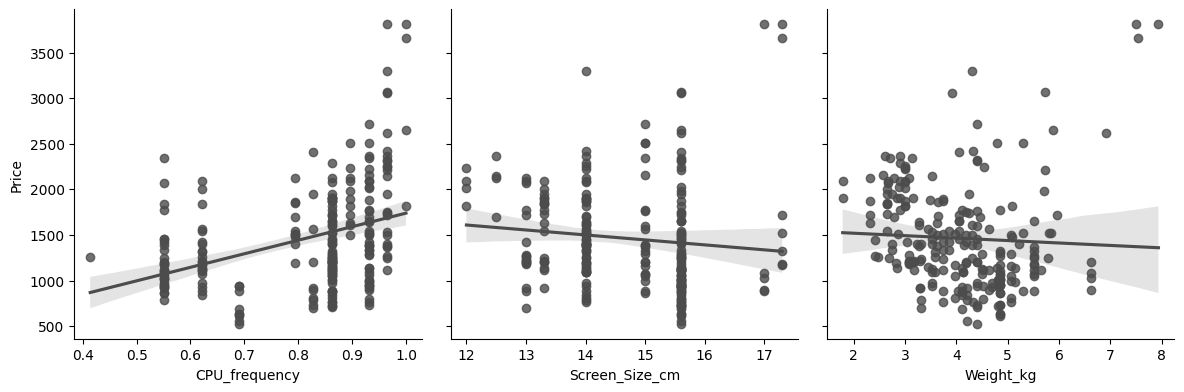

In [16]:
g = sns.PairGrid(df, y_vars=["Price"], x_vars=["CPU_frequency", "Screen_Size_cm",'Weight_kg'], height=4)
g.map(sns.regplot, color=".3")

In [18]:
for param in ["CPU_frequency", "Screen_Size_cm","Weight_kg"]:
    print(df[[param,"Price"]].corr())

               CPU_frequency     Price
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000
                Screen_Size_cm     Price
Screen_Size_cm        1.000000 -0.110565
Price                -0.110565  1.000000
           Weight_kg     Price
Weight_kg   1.000000 -0.050312
Price      -0.050312  1.000000


"CPU_frequency" has a 36% positive correlation with the price of the laptops. The other two parameters have weak correlation with price.

##Categorical features
Generate Box plots for the different feature that hold categorical values. These features would be "Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"

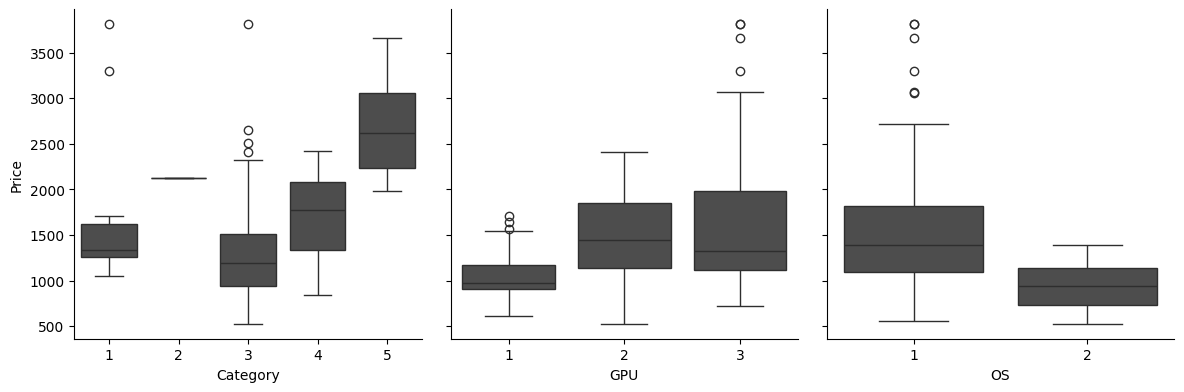

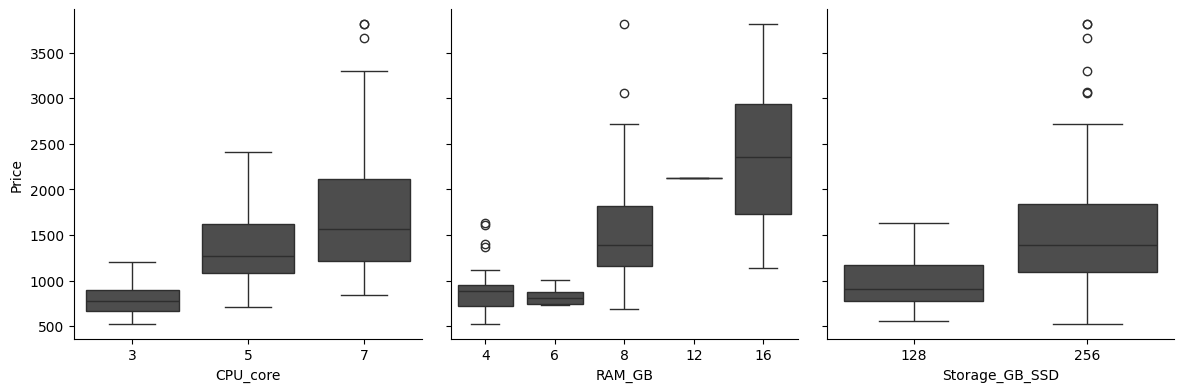

In [19]:
g = sns.PairGrid(df, y_vars=["Price"], x_vars=["Category", "GPU",'OS'], height=4)
g.map(sns.boxplot, color=".3")
h = sns.PairGrid(df, y_vars=["Price"], x_vars=["CPU_core", "RAM_GB",'Storage_GB_SSD'], height=4)
h.map(sns.boxplot, color=".3")

##Descriptive Statistical Analysis
Generate the statistical description of all the features being used in the data set. Include "object" data types as well.

In [20]:
print(df.describe())
print(df.describe(include=['object']))

       Unnamed: 0    Category         GPU          OS    CPU_core  \
count  238.000000  238.000000  238.000000  238.000000  238.000000   
mean   118.500000    3.205882    2.151261    1.058824    5.630252   
std     68.848868    0.776533    0.638282    0.235790    1.241787   
min      0.000000    1.000000    1.000000    1.000000    3.000000   
25%     59.250000    3.000000    2.000000    1.000000    5.000000   
50%    118.500000    3.000000    2.000000    1.000000    5.000000   
75%    177.750000    4.000000    3.000000    1.000000    7.000000   
max    237.000000    5.000000    3.000000    2.000000    7.000000   

       Screen_Size_cm  CPU_frequency      RAM_GB  Storage_GB_SSD   Weight_kg  \
count      238.000000     238.000000  238.000000      238.000000  238.000000   
mean        14.687951       0.813822    7.882353      245.781513    4.106221   
std          1.165589       0.141860    2.482603       34.765316    1.078442   
min         12.000000       0.413793    4.000000      128.

##GroupBy and Pivot Tables
Group the parameters "GPU", "CPU_core" and "Price" to make a pivot table and visualize this connection using the pcolor plot.

In [21]:
df_gptest = df[['GPU','CPU_core','Price']]
grouped_test1 = df_gptest.groupby(['GPU','CPU_core'],as_index=False).mean()
grouped_pivot = grouped_test1.pivot(index='GPU',columns='CPU_core')
grouped_pivot

Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561

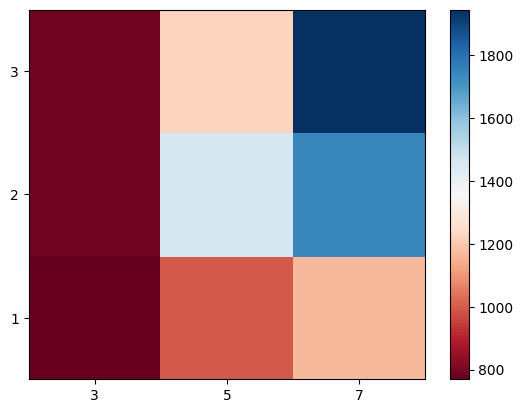

In [22]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)

##Pearson Correlation and p-values
Use the scipy.stats.pearsonr() function to evaluate the Pearson Coefficient and the p-values for each parameter tested above. This will help you determine the parameters most likely to have a strong effect on the price of the laptops.

In [23]:
from scipy import stats
to_test=["CPU_frequency", "Screen_Size_cm","Weight_kg","Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"]
for item in to_test:
  pearson_coef, p_value = stats.pearsonr(df[item], df['Price'])
  print(f"The Pearson Correlation Coefficient for {item} is {pearson_coef} with a P-value of P = {p_value}")

The Pearson Correlation Coefficient for CPU_frequency is 0.366665558925886 with a P-value of P = 5.5024633507134225e-09
The Pearson Correlation Coefficient for Screen_Size_cm is -0.11056471275425062 with a P-value of P = 0.08876456732700777
The Pearson Correlation Coefficient for Weight_kg is -0.05031225837751547 with a P-value of P = 0.43976938534338944
The Pearson Correlation Coefficient for Category is 0.28624275581264125 with a P-value of P = 7.225696235806733e-06
The Pearson Correlation Coefficient for GPU is 0.2882981988881428 with a P-value of P = 6.166949698364282e-06
The Pearson Correlation Coefficient for OS is -0.22172980114827384 with a P-value of P = 0.0005696642559246749
The Pearson Correlation Coefficient for CPU_core is 0.4593977773355115 with a P-value of P = 7.912950127009034e-14
The Pearson Correlation Coefficient for RAM_GB is 0.5492972971857844 with a P-value of P = 3.681560628842868e-20
The Pearson Correlation Coefficient for Storage_GB_SSD is 0.2434207552181029 w

##Conclusion: Important Variables
We now have a better idea of what our data looks like and which variables are important to take into account when predicting the laptop price. We have narrowed it down to the following variables:

Continuous numerical variables: CPU_frequency

Categorical variables: CPU_core, RAM_GB

As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.

#Model Development
##Linear Regression
You have learnt that "CPU_frequency" is the parameter with the lowest p-value among the different features of the dataset. Create a single feature Linear Regression model that fits the pair of "CPU_frequency" and "Price" to find the model for prediction.

In [24]:
lm = LinearRegression()

X = df[['CPU_frequency']]
Y = df['Price']

lm.fit(X,Y)

Yhat=lm.predict(X)

Generate the Distribution plot for the predicted values and that of the actual values. How well did the model perform?

In [ ]:
ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")

# Create a distribution plot for predicted values
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

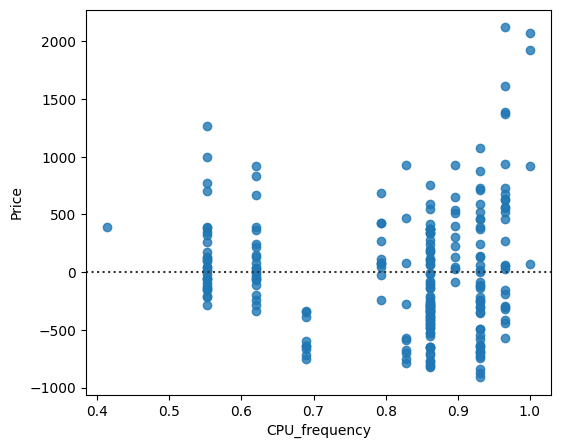

In [26]:
# Create a residual plot
width = 6
height = 5
plt.figure(figsize=(width, height))
sns.residplot(x=df['CPU_frequency'], y=df['Price'])
plt.show()

Evaluate the Mean Squared Error and R^2 score values for the model.

In [27]:
mse_slr = mean_squared_error(df['Price'], Yhat)
r2_score_slr = lm.score(X, Y)
print('The R-square for Linear Regression is: ', r2_score_slr)
print('The mean square error of price and predicted value is: ', mse_slr)

The R-square for Linear Regression is:  0.1344436321024326
The mean square error of price and predicted value is:  284583.4405868629


##Multiple Linear Regression

The parameters which have a low enough p-value so as to indicate strong relationship with the 'Price' value are 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU' and 'Category'. Use all these variables to create a Multiple Linear Regression system.

In [28]:
Z=df[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']]
Y=df['Price']
lm2=LinearRegression()
lm2.fit(Z,Y)
Y_hat = lm2.predict(Z)

In [ ]:
#Plot the Distribution graph of the predicted values as well as the Actual values
ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")

# Create a distribution plot for predicted values
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

In [30]:
#Find the R^2 score and the MSE value for this fit. Is this better or worst than the performance of Single Linear Regression?
print('The R-square is: ', lm2.score(Z, Y))
Y_predict_multifit = lm2.predict(Z)
print('The mean square error of price and predicted value using multifit is: ', mean_squared_error(X, Y_predict_multifit))

The R-square is:  0.5082509055187374
The mean square error of price and predicted value using multifit is:  2303118.6767890197


**Simple Linear Regression**: Using CPU_frequency as a Predictor Variable of Price.

R-squared: 0.1344436321024326

MSE: 2.84x10^5

**Multiple Linear Regression**: Using  'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU' and 'Category' as Predictor Variables of Price.

R-squared: 0.5082509055187374

MSE: 23.0x10^5

###Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)
Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and even act as noise. As a result, you should always check the MSE and R^2.

In order to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.

MSE: The MSE of SLR is 2.84x10^5 while MLR has an MSE of 23.0x10^5. The MSE of SRL is much smaller.

R-squared: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR.
The R-squared for the SLR (~ 0.134) is very small compared to the R-squared for the MLR (~0.508).

The MSE, R-squared and the distribution plot show that the MLR seems like the  better model fit in this case compared to SLR.

##Polynomial Regression
Use the variable "CPU_frequency" to create Polynomial features. Try this for 3 different values of polynomial degrees. Remember that polynomial fits are done using numpy.polyfit.

In [31]:
X = X.to_numpy().flatten()
f1 = np.polyfit(X, Y, 1)
p1 = np.poly1d(f1)

f3 = np.polyfit(X, Y, 3)
p3 = np.poly1d(f3)

f5 = np.polyfit(X, Y, 5)
p5 = np.poly1d(f5)

In [32]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max(),100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')

Call this function for the 3 models created and get the required graphs.

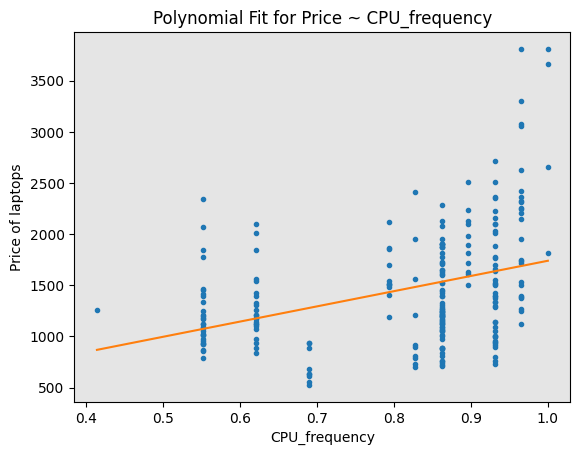

In [33]:
PlotPolly(p1, X, Y, 'CPU_frequency')

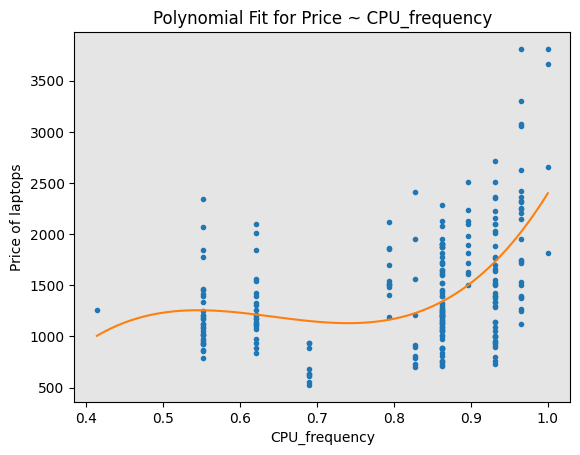

In [34]:
PlotPolly(p3, X, Y, 'CPU_frequency')

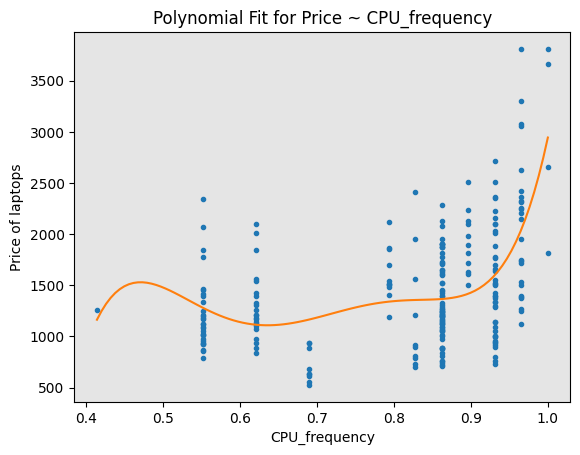

In [35]:
PlotPolly(p5, X, Y, 'CPU_frequency')

Calculate the R^2 and MSE values for these fits.

In [36]:
r_squared_1 = r2_score(Y, p1(X))
print('The R-square value for 1st degree polynomial is: ', r_squared_1)
print('The MSE value for 1st degree polynomial is: ', mean_squared_error(Y,p1(X)))
r_squared_3 = r2_score(Y, p3(X))
print('The R-square value for 3rd degree polynomial is: ', r_squared_3)
print('The MSE value for 3rd degree polynomial is: ', mean_squared_error(Y,p3(X)))
r_squared_5 = r2_score(Y, p5(X))
print('The R-square value for 5th degree polynomial is: ', r_squared_5)
print('The MSE value for 5th degree polynomial is: ', mean_squared_error(Y,p5(X)))

The R-square value for 1st degree polynomial is:  0.13444363210243238
The MSE value for 1st degree polynomial is:  284583.44058686297
The R-square value for 3rd degree polynomial is:  0.26692640796531086
The MSE value for 3rd degree polynomial is:  241024.86303848776
The R-square value for 5th degree polynomial is:  0.3030822706443337
The MSE value for 5th degree polynomial is:  229137.29548055358


##Pipeline

In [37]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
Z=df[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']]
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)

In [38]:
print('MSE for multi-variable polynomial pipeline is: ', mean_squared_error(Y, ypipe))
print('R^2 for multi-variable polynomial pipeline is: ', r2_score(Y, ypipe))

MSE for multi-variable polynomial pipeline is:  120595.86128028373
R^2 for multi-variable polynomial pipeline is:  0.6332094535859658


##Prediction and Decision Making
The values of R^2 increase as we go from Single Linear Regression to Multiple Linear Regression. Further, if we go for multiple linear regression extended with polynomial features, we get an even better R^2 value and a lower MSE.

#Model Evaluation and refinement
##Using Cross validation to improve the model

In [39]:
y_data = df['Price']
x_data = df.drop('Price',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 24
number of training samples: 214


Create a single variable linear regression model using "CPU_frequency" parameter.

In [40]:
lre=LinearRegression()
lre.fit(x_train[['CPU_frequency']], y_train)
print('R^2 score training data: ',lre.score(x_train[['CPU_frequency']], y_train))
print('R^2 score test data: ',lre.score(x_test[['CPU_frequency']], y_test))

R^2 score training data:  0.14829792099817962
R^2 score test data:  -0.06599437350393766


Run a 4-fold cross validation on the model

In [ ]:
Rcross = cross_val_score(lre, x_data[['CPU_frequency']], y_data, cv=4)
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are -0.16109232388595096 and the standard deviation is 0.3849579786664708


Split the data set into training and testing components again, this time reserving 50% of the data set for testing.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.5, random_state=0)

To identify the point of overfitting the model on the parameter "CPU_frequency", you'll need to create polynomial features using the single attribute. You need to evaluate the R^2 scores of the model created using different degrees of polynomial features, ranging from 1 to 5. Save this set of values of R^2 score as a list.

In [ ]:
lre = LinearRegression()
Rsqu_test = []
order = [1, 2, 3, 4, 5]
for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train[['CPU_frequency']])
    x_test_pr = pr.fit_transform(x_test[['CPU_frequency']])
    lre.fit(x_train_pr, y_train)
    Rsqu_test.append(lre.score(x_test_pr, y_test))

Plot the values of R^2 scores against the order.

Text(0.5, 1.0, 'R^2 Using Test Data')

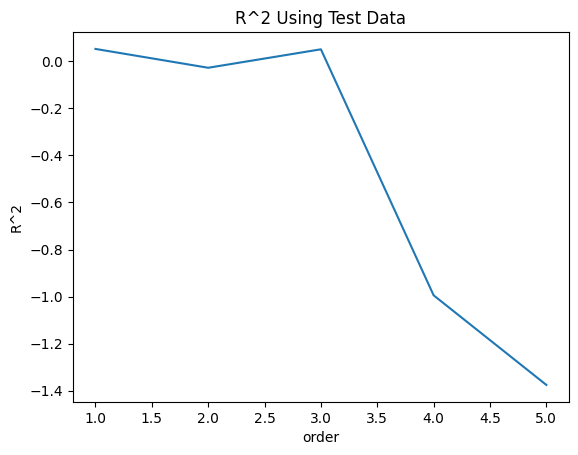

In [ ]:
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

##Ridge Regression

Now consider that you have multiple features, i.e. 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU' and 'Category'. Create a polynomial feature model that uses all these parameters with degree=2. Also create the training and testing attribute sets.

In [ ]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])
x_test_pr=pr.fit_transform(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])

Create a Ridge Regression model and evaluate it using values of the hyperparameter alpha ranging from 0.001 to 1 with increments of 0.001. Create a list of all Ridge Regression R^2 scores for training and testing data.

In [ ]:
from tqdm import tqdm
Rsqu_test = []
Rsqu_train = []
Alpha = np.arange(0.001,1,0.001)
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha)
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})
    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 999/999 [00:12<00:00, 80.11it/s, Test Score=0.423, Train Score=0.669] 


Plot the R^2 values for training and testing sets with respect to the value of alpha

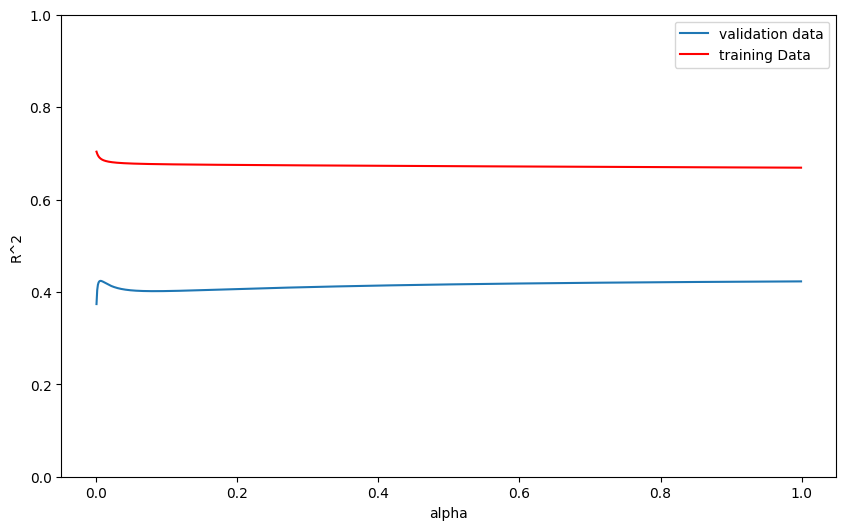

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(Alpha, Rsqu_test, label='validation data')
plt.plot(Alpha, Rsqu_train, 'r', label='training Data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.ylim(0, 1)
plt.legend()

##Grid Search

Using the raw data and the same set of features as used above, use GridSearchCV to identify the value of alpha for which the model performs best. Assume the set of alpha values to be used as

{0.0001, 0.001, 0.01, 0.1, 1, 10}

In [ ]:
parameters1= [{'alpha': [0.0001,0.001,0.01, 0.1, 1, 10]}]
RR=Ridge()
Grid1 = GridSearchCV(RR, parameters1,cv=4)
Grid1.fit(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']], y_train)
BestRR=Grid1.best_estimator_
print('Best value of alpha: ',BestRR.score(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU','Category']], y_test))

Best value of alpha:  0.300990504869182
